# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [18]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 631


In [19]:
cities

['ribeira grande',
 'qandala',
 'hilo',
 'busselton',
 'aranos',
 'turhal',
 'butaritari',
 'provideniya',
 'ushuaia',
 'kaitangata',
 'fortuna',
 'hermanus',
 'bhatkal',
 'rikitea',
 'korla',
 'klaksvik',
 'burica',
 'te anau',
 'albany',
 'victoria',
 'waipawa',
 'aripuana',
 'deputatskiy',
 'kamenskoye',
 'lima',
 'atuona',
 'ocos',
 'airai',
 'esperance',
 'bud',
 'dhidhdhoo',
 'tlaxiaco',
 'mataura',
 'samarai',
 'kavieng',
 'brae',
 'cockburn harbour',
 'karpuninskiy',
 'jamestown',
 'casa grande',
 'sitka',
 'longyearbyen',
 'barrow',
 'cabo san lucas',
 'grimshaw',
 'bredasdorp',
 'husavik',
 'cape town',
 'amderma',
 'tuatapere',
 'saleaula',
 'umzimvubu',
 'brus laguna',
 'bambous virieux',
 'ponta delgada',
 'lebu',
 'barentsburg',
 'cidreira',
 'dikson',
 'iqaluit',
 'tasiilaq',
 'champerico',
 'karkaralinsk',
 'barstow',
 'nuevo progreso',
 'belushya guba',
 'leningradskiy',
 'port elizabeth',
 'qaanaaq',
 'marcona',
 'isangel',
 'punta arenas',
 'nioro',
 'georgetown',
 '

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
# How do I know if the code is running (step by step) if it's within a for loop
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "APPID=" + weather_api_key + "&units=metric" + "&q=" + city.replace(" ", "+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    # WHAT AM I DOING CORRECTLY HERE AND WHAT AM I DOING INCORRECTLY
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | qandala
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | aranos
Processing Record 6 of Set 1 | turhal
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | provideniya
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | kaitangata
Processing Record 11 of Set 1 | fortuna
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | bhatkal
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | korla
Processing Record 16 of Set 1 | klaksvik
Processing Record 17 of Set 1 | burica
City not found. Skipping...
Processing Record 18 of Set 1 | te anau
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | victoria
Processing Record 21 of Set 1 | waipawa
Processing Record 22 of Set 1 | aripuana
Processing Record 23 of Set

Processing Record 35 of Set 4 | saint george
Processing Record 36 of Set 4 | great yarmouth
Processing Record 37 of Set 4 | alexandria
Processing Record 38 of Set 4 | bantacan
Processing Record 39 of Set 4 | marsa matruh
Processing Record 40 of Set 4 | luderitz
Processing Record 41 of Set 4 | high rock
Processing Record 42 of Set 4 | sao joao da barra
Processing Record 43 of Set 4 | yenagoa
Processing Record 44 of Set 4 | boca do acre
Processing Record 45 of Set 4 | veraval
Processing Record 46 of Set 4 | puerto ayora
Processing Record 47 of Set 4 | waddan
Processing Record 48 of Set 4 | lagoa
Processing Record 49 of Set 4 | warqla
City not found. Skipping...
Processing Record 0 of Set 5 | sioux lookout
Processing Record 1 of Set 5 | ancud
Processing Record 2 of Set 5 | mbandaka
Processing Record 3 of Set 5 | aksarka
Processing Record 4 of Set 5 | srednekolymsk
Processing Record 5 of Set 5 | pevek
Processing Record 6 of Set 5 | jiayuguan
Processing Record 7 of Set 5 | gusau
Processing 

Processing Record 28 of Set 8 | bambanglipuro
Processing Record 29 of Set 8 | port macquarie
Processing Record 30 of Set 8 | lavrentiya
Processing Record 31 of Set 8 | srandakan
Processing Record 32 of Set 8 | geraldton
Processing Record 33 of Set 8 | vila
Processing Record 34 of Set 8 | blovstrod
Processing Record 35 of Set 8 | port hedland
Processing Record 36 of Set 8 | garachine
Processing Record 37 of Set 8 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 38 of Set 8 | san quintin
Processing Record 39 of Set 8 | dingle
Processing Record 40 of Set 8 | tualatin
Processing Record 41 of Set 8 | grand-santi
Processing Record 42 of Set 8 | shiyan
Processing Record 43 of Set 8 | fort nelson
Processing Record 44 of Set 8 | chelmek
Processing Record 45 of Set 8 | innisfail
Processing Record 46 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 47 of Set 8 | rovaniemi
Processing Record 48 of Set 8 | tanggu
Processing Record 49 of Set 8 | qaqortoq
Processing

Processing Record 14 of Set 12 | tobane
Processing Record 15 of Set 12 | sungaipenuh
Processing Record 16 of Set 12 | opunake
Processing Record 17 of Set 12 | hihifo
City not found. Skipping...
Processing Record 18 of Set 12 | charyshskoye
Processing Record 19 of Set 12 | tacuarembo
Processing Record 20 of Set 12 | rundu
Processing Record 21 of Set 12 | misratah
Processing Record 22 of Set 12 | pastavy
Processing Record 23 of Set 12 | saint-louis
Processing Record 24 of Set 12 | antsohihy
Processing Record 25 of Set 12 | aklavik
Processing Record 26 of Set 12 | moundou
Processing Record 27 of Set 12 | synya
Processing Record 28 of Set 12 | sacel
Processing Record 29 of Set 12 | atambua
Processing Record 30 of Set 12 | atbasar
Processing Record 31 of Set 12 | hurricane
Processing Record 32 of Set 12 | bokspits
City not found. Skipping...
Processing Record 33 of Set 12 | ambon
Processing Record 34 of Set 12 | grand gaube
Processing Record 35 of Set 12 | le vauclin
Processing Record 36 of

In [21]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [22]:
city_weather

{'coord': {'lon': 97.0333, 'lat': 20.7833},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 15.42,
  'feels_like': 14.3,
  'temp_min': 15.42,
  'temp_max': 15.42,
  'pressure': 1011,
  'humidity': 49,
  'sea_level': 1011,
  'grnd_level': 858},
 'visibility': 10000,
 'wind': {'speed': 1.66, 'deg': 174, 'gust': 1.72},
 'clouds': {'all': 0},
 'dt': 1679951743,
 'sys': {'country': 'MM', 'sunrise': 1679959756, 'sunset': 1680003887},
 'timezone': 23400,
 'id': 1293960,
 'name': 'Taunggyi',
 'cod': 200}

In [23]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,15.99,81,5,9.39,PT,1679951548
1,qandala,11.4720,49.8728,29.03,69,96,3.08,SO,1679951550
2,hilo,19.7297,-155.0900,27.93,86,75,4.02,US,1679951421
3,busselton,-33.6500,115.3333,11.69,89,0,4.32,AU,1679951550
4,aranos,-24.1333,19.1167,24.63,46,87,5.43,NA,1679951551


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,15.99,81,5,9.39,PT,1679951548
1,qandala,11.4720,49.8728,29.03,69,96,3.08,SO,1679951550
2,hilo,19.7297,-155.0900,27.93,86,75,4.02,US,1679951421
3,busselton,-33.6500,115.3333,11.69,89,0,4.32,AU,1679951550
4,aranos,-24.1333,19.1167,24.63,46,87,5.43,NaN,1679951551


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

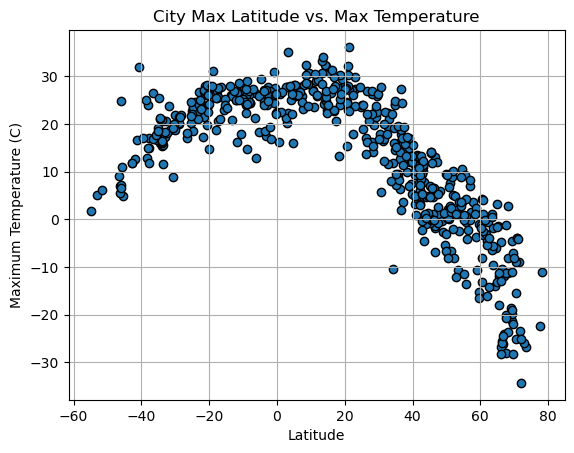

In [30]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, marker = "o", edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Max Temperature")
plt.ylabel("Maximum Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

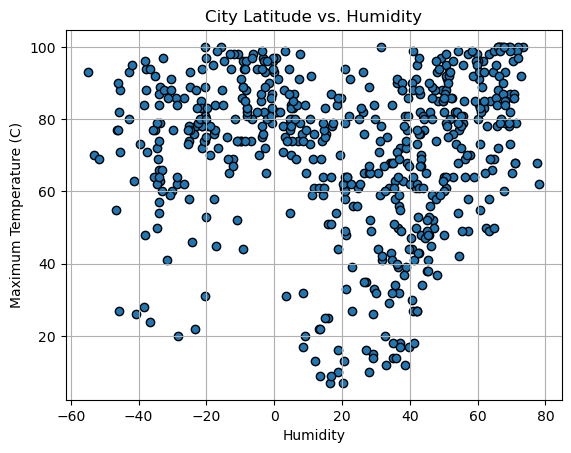

In [31]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, marker = "o", edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Maximum Temperature (C)")
plt.xlabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

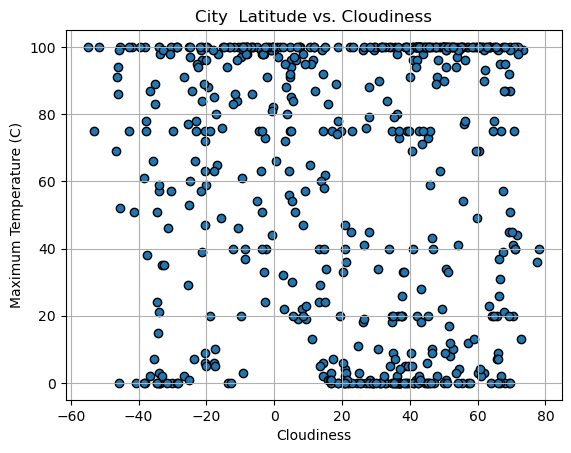

In [32]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, marker = "o", edgecolors = "black")

# Incorporate the other graph properties
plt.title("City  Latitude vs. Cloudiness")
plt.ylabel("Maximum Temperature (C)")
plt.xlabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

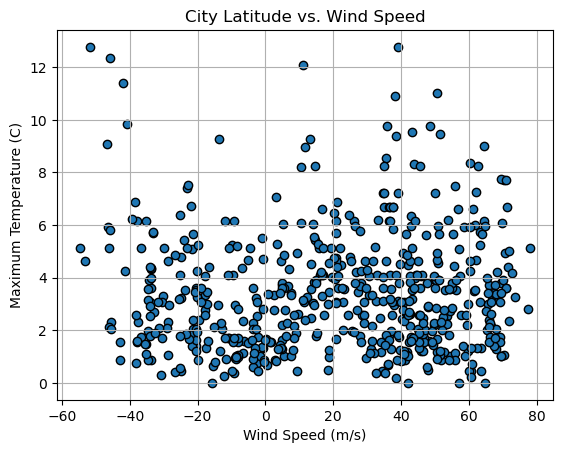

In [33]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, marker = "o", edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Maximum Temperature (C)")
plt.xlabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,15.99,81,5,9.39,PT,1679951548
1,qandala,11.4720,49.8728,29.03,69,96,3.08,SO,1679951550
2,hilo,19.7297,-155.0900,27.93,86,75,4.02,US,1679951421
5,turhal,40.3875,36.0811,12.37,47,9,2.43,TR,1679951551
6,butaritari,3.0707,172.7902,27.67,75,72,7.07,KI,1679951551


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,busselton,-33.6500,115.3333,11.69,89,0,4.32,AU,1679951550
4,aranos,-24.1333,19.1167,24.63,46,87,5.43,NaN,1679951551
8,ushuaia,-54.8000,-68.3000,1.81,93,100,5.14,AR,1679951552
9,kaitangata,-46.2817,169.8464,7.09,77,91,5.94,NZ,1679951552
11,hermanus,-34.4187,19.2345,16.56,69,15,3.91,ZA,1679951557


###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE